In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer
from pca import pca
from yellowbrick.features import PCA
import pickle
plt.style.use("default")

In [2]:
# Import our created csv file from other notebook

df = pd.read_csv("raw_features.csv",index_col="Unnamed: 0")

In [3]:
# Separate features from target

X = df.drop("classes", axis=1)
y = df["classes"]

In [4]:
# Scale our features to prevent wrong effects of size

X_scaled = pd.DataFrame(StandardScaler().fit_transform(X))

# Label encode our target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [5]:
# rejoin our features

Xy = X_scaled.join(y)

In [ ]:
#with plt.rc_context(rc={'figure.max_open_warning': 0}): #helps with memory
#    for feat in X_scaled.columns:
#        plt.figure()
#        Xy.groupby("classes")[feat].hist()
#        plt.title(feat)
        
    
# Uncomment to produce the plots, there are a lot to make so I wont display them in the notebook.
# We see that we have skewness in our data, we need a gaussian distribution input for better results

In [6]:
# We use a power transformer object to reduce skewness of data in order to have gaussian distribution. We use the default
# Yao-Johnson transform parameter as it takes kare of negative values which we have.
# The powertransform object also standard scales the data so we can give it the raw X values
pt = PowerTransformer()
X_pt = pd.DataFrame(pt.fit_transform(X))


In [7]:
Xy_pt = X_pt.join(y)

In [ ]:
#with plt.rc_context(rc={'figure.max_open_warning': 0}): #helps with memory
#    for feat in X_pt.columns:
#        plt.figure()
#        Xy_pt.groupby("classes")[feat].hist()
#        plt.title(feat)

# We see that we reduced our skewness a lot, our data is much more gaussian.

In [8]:
# Let's have a look at feature importance, we create a PCA object and plot the explained variance

pca_full = pca()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [136] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [57] that covers the [95.00%] explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


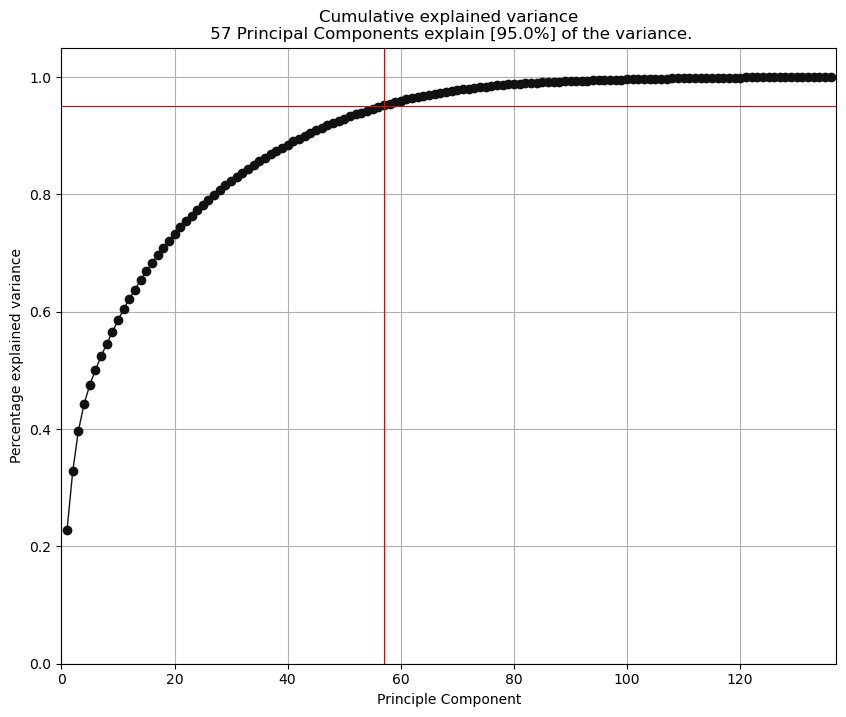

<Figure size 640x480 with 0 Axes>

In [9]:
pca_full.fit_transform(X_pt)
pca_full.plot();

# We see that 57 components explain 95% of our data, this is a very good deal 
# It's a good idea to reduce dimensions for our ML algorithms

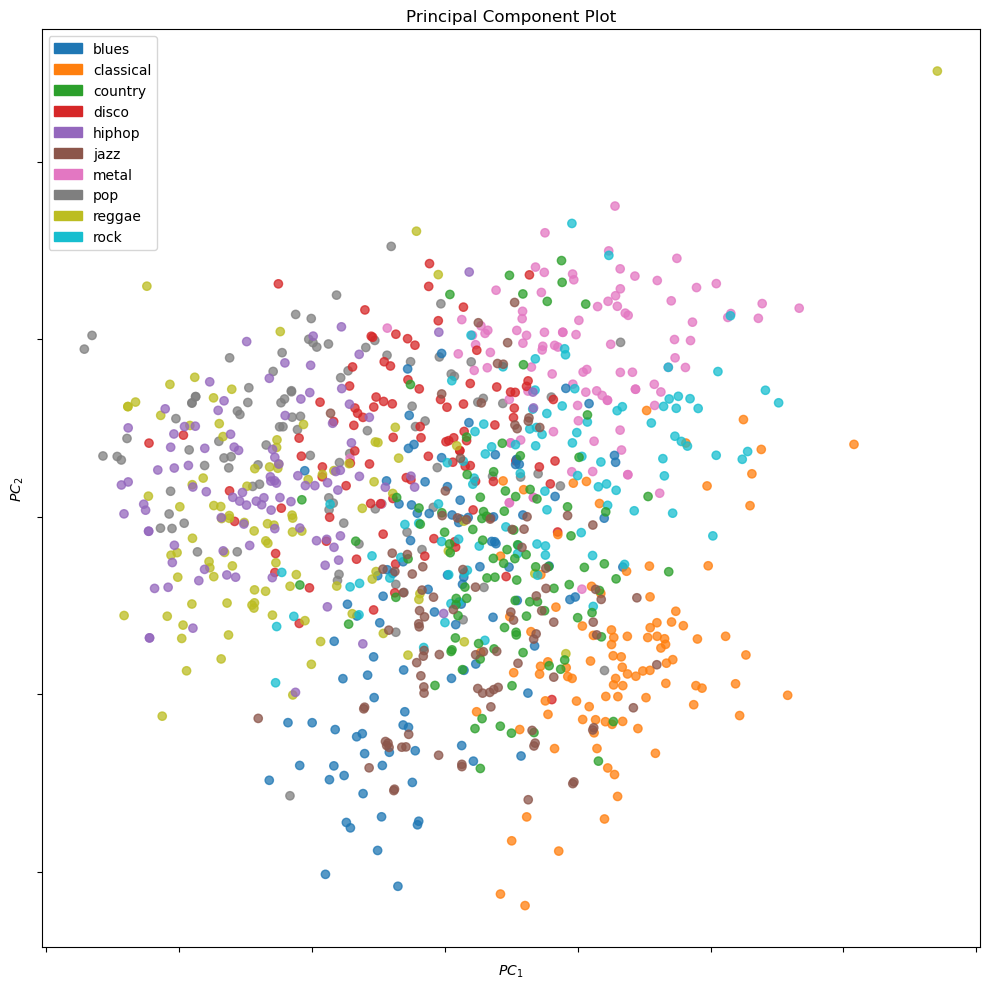

In [10]:
# Now we can also plot our data on the 2 first components to see 2D spread of our classes.

plt.figure(figsize=(10,10))
visualizer = PCA(classes=encoder.classes_,colormap="tab10")
visualizer.fit_transform_show(X_pt,y_encoded);

# We can see already clusters of our classes even though we used our first 2 components 
# which only explain around 38% of our data

In [11]:
Xy_pt.to_csv("preprocessed_features.csv")

In [14]:
pickle.dump(pt, open("powertransformer.sav","wb"))